In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_co_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        26.4475 (20.1094, 36.0056) (19.2211, 34.5610) 15.3399 (Jnode 202)\n',
 't_n104        20.5090 (16.5551, 26.2855) (16.0492, 25.3830)  9.3338 (Jnode 201)\n',
 't_n105        19.8577 (16.0523, 25.4393) (15.7203, 24.7106)  8.9902 (Jnode 200)\n',
 't_n106        17.8035 (14.4944, 22.7049) (14.2032, 22.1358)  7.9326 (Jnode 199)\n',
 't_n107        17.3118 (14.1067, 22.0691) (13.7356, 21.3923)  7.6566 (Jnode 198)\n',
 't_n108        16.3983 (13.3916, 20.8697) (13.0643, 20.2202)  7.1559 (Jnode 197)\n',
 't_n109         8.8594 ( 7.5874, 11.1683) ( 7.3796, 10.7027)  3.3231 (Jnode 196)\n',
 't_n110         8.7892 ( 7.5313, 11.0717) ( 7.3591, 10.6469)  3.2878 (Jnode 195)\n',
 't_n111         8.5631 ( 7.3471, 10.7823) ( 7.1570, 10.3433)  3.1863 (Jnode 194)\n',
 't_n112         8.2821 ( 7.1074, 10.4314) ( 6.9237, 10.0013)  3.0776 (Jnode 193)\n',
 't_n113         7.9104 ( 6.7961,  9.9471) ( 6.6046,  9.5164)  2.9118 (Jnode 192)\n',
 't_n114         5.4371 ( 4.6138,  6.6905) ( 4.5044,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[26.4475,
 20.509,
 19.8577,
 17.8035,
 17.3118,
 16.3983,
 8.8594,
 8.7892,
 8.5631,
 8.2821,
 7.9104,
 5.4371,
 3.4037,
 2.4183,
 1.4607,
 6.0646,
 5.224,
 8.2288,
 5.7636,
 7.9129,
 6.3896,
 5.22,
 4.4163,
 7.6585,
 7.2378,
 1.9728,
 8.4693,
 7.7251,
 6.0485,
 4.8722,
 5.5742,
 5.1051,
 4.3181,
 3.9966,
 15.3422,
 12.2101,
 16.5092,
 15.065,
 13.9933,
 11.475,
 6.1084,
 10.9646,
 9.587,
 8.5058,
 7.2479,
 13.6326,
 12.5273,
 2.9698,
 1.3067,
 18.6377,
 17.5211,
 15.8017,
 15.2461,
 16.3884,
 10.6774,
 13.3493,
 10.4883,
 19.8828,
 18.6279,
 16.8495,
 15.8927,
 13.3903,
 8.7852,
 11.8236,
 16.6496,
 5.5819,
 16.7782,
 11.8843,
 11.5303,
 11.2622,
 10.6582,
 9.7848,
 9.3392,
 9.0058,
 8.6073,
 7.6618,
 6.638,
 5.536,
 7.7876,
 7.3421,
 5.8429,
 6.6278,
 8.462,
 7.8352,
 7.2783,
 6.3108,
 4.5437,
 7.9934,
 7.1956,
 6.3729,
 9.3093,
 8.8398,
 8.3885,
 7.4347,
 5.4788,
 8.3237,
 5.2072,
 4.2365,
 1.6106,
 11.4835,
 9.8095]

In [7]:
lower_ci_iqtree

[6.0056,
 6.2855,
 5.4393,
 2.7049,
 2.0691,
 0.8697,
 0.5874,
 0.5313,
 0.3471,
 0.1074,
 0.7961,
 0.6138,
 0.9818,
 0.1456,
 0.0078,
 0.0846,
 0.2969,
 0.0752,
 0.2631,
 0.8008,
 0.422,
 0.2888,
 0.2821,
 0.526,
 0.1431,
 0.1818,
 0.2385,
 0.5779,
 0.9922,
 0.9012,
 0.4877,
 0.0706,
 0.3579,
 0.7015,
 9.5134,
 0.449,
 1.0235,
 9.202,
 7.8844,
 0.0406,
 0.232,
 0.5861,
 0.3871,
 0.4686,
 0.4353,
 7.5311,
 0.8264,
 0.4173,
 0.5891,
 3.808,
 2.3697,
 0.2843,
 9.6542,
 0.9863,
 0.4497,
 7.4125,
 0.6432,
 5.4997,
 3.8384,
 1.6433,
 0.4542,
 7.4409,
 0.1642,
 0.954,
 1.4331,
 0.1045,
 1.606,
 0.2358,
 0.9774,
 0.7644,
 0.2947,
 0.6319,
 0.2915,
 0.0336,
 0.7178,
 0.9662,
 0.1369,
 0.2286,
 0.0698,
 0.7137,
 0.4618,
 0.1353,
 0.6149,
 0.1269,
 0.69,
 0.9207,
 0.4742,
 0.2416,
 0.6138,
 0.9402,
 0.2626,
 0.8891,
 0.5295,
 0.7466,
 0.1052,
 0.4617,
 0.3753,
 0.6624,
 0.9142,
 0.8968,
 0.5022]

In [8]:
upper_ci_iqtree

[19.2211,
 16.0492,
 15.7203,
 14.2032,
 13.7356,
 13.0643,
 11.1683,
 11.0717,
 10.7823,
 10.4314,
 9.9471,
 6.6905,
 3.8529,
 2.586,
 2.1025,
 7.6776,
 6.6693,
 10.3685,
 7.188,
 9.9624,
 8.0773,
 6.6905,
 5.8946,
 9.6516,
 9.1518,
 2.9711,
 10.6889,
 9.7891,
 7.7686,
 6.3646,
 7.2375,
 6.6755,
 5.7108,
 5.6476,
 12.1651,
 15.9003,
 13.1057,
 12.0056,
 11.0584,
 14.8206,
 8.4982,
 14.2271,
 12.6018,
 11.2651,
 9.7453,
 10.4724,
 16.2823,
 5.5663,
 2.6869,
 14.6291,
 13.7665,
 12.2958,
 11.8436,
 12.8465,
 14.4841,
 10.0525,
 14.1335,
 15.5399,
 14.6005,
 13.1584,
 12.3726,
 10.1114,
 12.1331,
 15.5792,
 12.8569,
 8.4774,
 12.912,
 17.0535,
 16.5744,
 16.2169,
 15.3782,
 14.0647,
 13.4306,
 12.9487,
 12.3506,
 11.0252,
 9.5753,
 8.0042,
 11.2042,
 10.5308,
 8.3859,
 9.5485,
 12.1737,
 11.3176,
 10.5615,
 9.2829,
 6.9615,
 11.5211,
 10.4013,
 9.2116,
 13.3691,
 12.7009,
 12.0459,
 10.7277,
 7.944,
 11.994,
 8.0308,
 6.6499,
 2.8091,
 16.5039,
 14.1866]

In [9]:
file_LG = open("LG_co_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all.png')

In [11]:
posterior_mean_baseml

[37.1247,
 29.2688,
 27.6796,
 24.7836,
 23.8185,
 21.7785,
 12.4846,
 12.3146,
 11.6924,
 11.0386,
 10.3577,
 6.6611,
 3.8166,
 2.4668,
 2.0131,
 7.8904,
 6.4777,
 11.0425,
 7.1755,
 10.4356,
 8.2645,
 6.5923,
 6.1853,
 10.2497,
 9.4623,
 3.073,
 11.6276,
 10.3238,
 8.0447,
 6.4075,
 7.4543,
 6.5993,
 5.3839,
 6.0842,
 20.0976,
 16.4941,
 22.3481,
 20.0573,
 18.081,
 14.6759,
 8.1934,
 14.4465,
 12.1783,
 10.4319,
 8.5617,
 18.161,
 16.4241,
 5.646,
 2.6564,
 24.8023,
 22.4839,
 19.3947,
 18.9988,
 21.223,
 13.9607,
 17.2461,
 13.0017,
 28.1649,
 26.0411,
 23.0387,
 21.0189,
 17.7093,
 12.4042,
 15.147,
 22.5613,
 8.7855,
 22.9432,
 20.0416,
 18.8578,
 17.8335,
 16.602,
 14.9723,
 14.0581,
 13.2582,
 12.2639,
 10.5927,
 8.9155,
 7.3556,
 10.7814,
 9.953,
 7.7946,
 8.4977,
 12.2286,
 11.0061,
 9.8635,
 8.3775,
 5.967,
 11.1206,
 9.7996,
 8.386,
 13.7725,
 12.6547,
 11.5081,
 9.8542,
 6.9137,
 11.881,
 8.7409,
 6.81,
 2.807,
 19.204,
 16.1842]

In [12]:
posterior_mean_iqtree

[26.4475,
 20.509,
 19.8577,
 17.8035,
 17.3118,
 16.3983,
 8.8594,
 8.7892,
 8.5631,
 8.2821,
 7.9104,
 5.4371,
 3.4037,
 2.4183,
 1.4607,
 6.0646,
 5.224,
 8.2288,
 5.7636,
 7.9129,
 6.3896,
 5.22,
 4.4163,
 7.6585,
 7.2378,
 1.9728,
 8.4693,
 7.7251,
 6.0485,
 4.8722,
 5.5742,
 5.1051,
 4.3181,
 3.9966,
 15.3422,
 12.2101,
 16.5092,
 15.065,
 13.9933,
 11.475,
 6.1084,
 10.9646,
 9.587,
 8.5058,
 7.2479,
 13.6326,
 12.5273,
 2.9698,
 1.3067,
 18.6377,
 17.5211,
 15.8017,
 15.2461,
 16.3884,
 10.6774,
 13.3493,
 10.4883,
 19.8828,
 18.6279,
 16.8495,
 15.8927,
 13.3903,
 8.7852,
 11.8236,
 16.6496,
 5.5819,
 16.7782,
 11.8843,
 11.5303,
 11.2622,
 10.6582,
 9.7848,
 9.3392,
 9.0058,
 8.6073,
 7.6618,
 6.638,
 5.536,
 7.7876,
 7.3421,
 5.8429,
 6.6278,
 8.462,
 7.8352,
 7.2783,
 6.3108,
 4.5437,
 7.9934,
 7.1956,
 6.3729,
 9.3093,
 8.8398,
 8.3885,
 7.4347,
 5.4788,
 8.3237,
 5.2072,
 4.2365,
 1.6106,
 11.4835,
 9.8095]

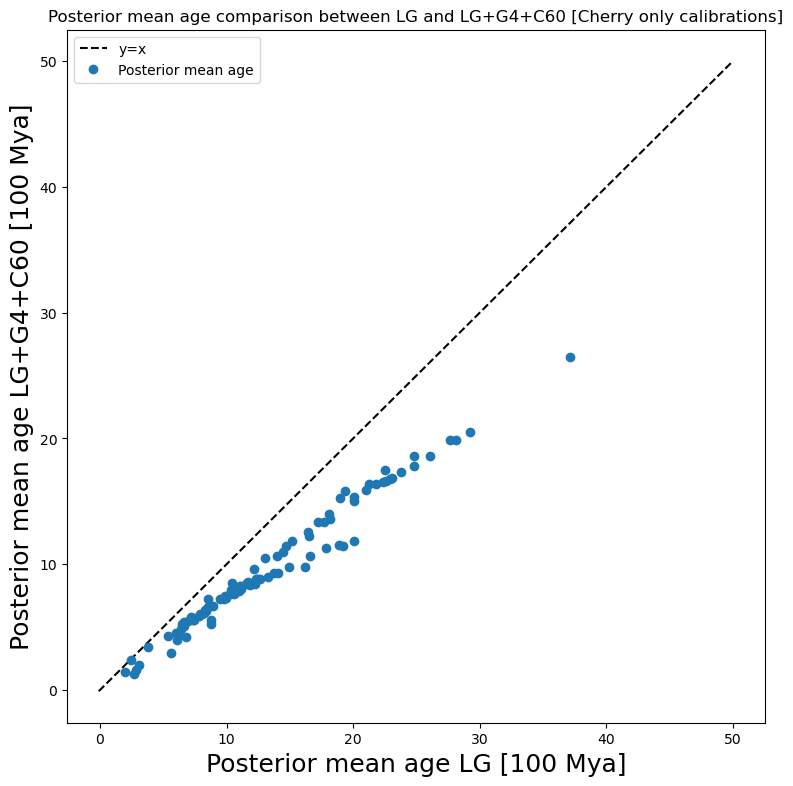

In [15]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_co_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')